# Homework 3

## Question 5.1

###      Using crime data from the file uscrime.txt (http://www.statsci.org/data/general/uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html),
###      test to see whether there are any outliers in the last column (number of crimes per 100,000 people).  Use the grubbs.test function in the outliers package in R.


In [1]:
library(caret)
# Read data from file
dfcrime <- read.delim("uscrime.txt", header = TRUE)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"


 	Variable	 	Description
    M       percentage of males aged 14–24 in total state population
    So		indicator variable for a southern state
    Ed		mean years of schooling of the population aged 25 years or over
    Po1		per capita expenditure on police protection in 1960
    Po2		per capita expenditure on police protection in 1959
    LF		labour force participation rate of civilian urban males in the age-group 14-24
    M.F		number of males per 100 females
    Pop		state population in 1960 in hundred thousands
    NW		percentage of nonwhites in the population
    U1		unemployment rate of urban males 14–24
    U2		unemployment rate of urban males 35–39
    Wealth		wealth: median value of transferable assets or family income
    Ineq		income inequality: percentage of families earning below half the median income
    Prob		probability of imprisonment: ratio of number of commitments to number of offenses
    Time		average time in months served by offenders in state prisons before their first release
    Crime		crime rate: number of offenses per 100,000 population in 1960

In [2]:
summary(dfcrime)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            

In [3]:
dfcrime

M    So Ed   Po1  Po2  LF    M.F   Pop NW   U1    U2  Wealth Ineq Prob    
1  15.1 1   9.1  5.8  5.6 0.510  95.0  33 30.1 0.108 4.1 3940   26.1 0.084602
2  14.3 0  11.3 10.3  9.5 0.583 101.2  13 10.2 0.096 3.6 5570   19.4 0.029599
3  14.2 1   8.9  4.5  4.4 0.533  96.9  18 21.9 0.094 3.3 3180   25.0 0.083401
4  13.6 0  12.1 14.9 14.1 0.577  99.4 157  8.0 0.102 3.9 6730   16.7 0.015801
5  14.1 0  12.1 10.9 10.1 0.591  98.5  18  3.0 0.091 2.0 5780   17.4 0.041399
6  12.1 0  11.0 11.8 11.5 0.547  96.4  25  4.4 0.084 2.9 6890   12.6 0.034201
7  12.7 1  11.1  8.2  7.9 0.519  98.2   4 13.9 0.097 3.8 6200   16.8 0.042100
8  13.1 1  10.9 11.5 10.9 0.542  96.9  50 17.9 0.079 3.5 4720   20.6 0.040099
9  15.7 1   9.0  6.5  6.2 0.553  95.5  39 28.6 0.081 2.8 4210   23.9 0.071697
10 14.0 0  11.8  7.1  6.8 0.632 102.9   7  1.5 0.100 2.4 5260   17.4 0.044498
11 12.4 0  10.5 12.1 11.6 0.580  96.6 101 10.6 0.077 3.5 6570   17.0 0.016201
12 13.4 0  10.8  7.5  7.1 0.595  97.2  47  5.9 0.083 3.1 5800   17.2 0.031201
13 12.8 0  11.3  6.7  6.0 0.624  97.2  28  1.0 0.077 2.5 5070   20.6 0.045302
14 13.5 0  11.7  6.2  6.1 0.595  98.6  22  4.6 0.077 2.7 5290   19.0 0.053200
15 15.2 1   8.7  5.7  5.3 0.530  98.6  30  7.2 0.092 4.3 4050   26.4 0.069100
16 14.2 1   8.8  8.1  7.7 0.497  95.6  33 32.1 0.116 4.7 4270   24.7 0.052099
17 14.3 0  11.0  6.6  6.3 0.537  97.7  10  0.6 0.114 3.5 4870   16.6 0.076299
18 13.5 1  10.4 12.3 11.5 0.537  97.8  31 17.0 0.089 3.4 6310   16.5 0.119804
19 13.0 0  11.6 12.8 12.8 0.536  93.4  51  2.4 0.078 3.4 6270   13.5 0.019099
20 12.5 0  10.8 11.3 10.5 0.567  98.5  78  9.4 0.130 5.8 6260   16.6 0.034801
21 12.6 0  10.8  7.4  6.7 0.602  98.4  34  1.2 0.102 3.3 5570   19.5 0.022800
22 15.7 1   8.9  4.7  4.4 0.512  96.2  22 42.3 0.097 3.4 2880   27.6 0.089502
23 13.2 0   9.6  8.7  8.3 0.564  95.3  43  9.2 0.083 3.2 5130   22.7 0.030700
24 13.1 0  11.6  7.8  7.3 0.574 103.8   7  3.6 0.142 4.2 5400   17.6 0.041598
25 13.0 0  11.6  6.3  5.7 0.641  98.4  14  2.6 0.070 2.1 4860   19.6 0.069197
26 13.1 0  12.1 16.0 14.3 0.631 107.1   3  7.7 0.102 4.1 6740   15.2 0.041698
27 13.5 0  10.9  6.9  7.1 0.540  96.5   6  0.4 0.080 2.2 5640   13.9 0.036099
28 15.2 0  11.2  8.2  7.6 0.571 101.8  10  7.9 0.103 2.8 5370   21.5 0.038201
29 11.9 0  10.7 16.6 15.7 0.521  93.8 168  8.9 0.092 3.6 6370   15.4 0.023400
30 16.6 1   8.9  5.8  5.4 0.521  97.3  46 25.4 0.072 2.6 3960   23.7 0.075298
31 14.0 0   9.3  5.5  5.4 0.535 104.5   6  2.0 0.135 4.0 4530   20.0 0.041999
32 12.5 0  10.9  9.0  8.1 0.586  96.4  97  8.2 0.105 4.3 6170   16.3 0.042698
33 14.7 1  10.4  6.3  6.4 0.560  97.2  23  9.5 0.076 2.4 4620   23.3 0.049499
34 12.6 0  11.8  9.7  9.7 0.542  99.0  18  2.1 0.102 3.5 5890   16.6 0.040799
35 12.3 0  10.2  9.7  8.7 0.526  94.8 113  7.6 0.124 5.0 5720   15.8 0.020700
36 15.0 0  10.0 10.9  9.8 0.531  96.4   9  2.4 0.087 3.8 5590   15.3 0.006900
37 17.7 1   8.7  5.8  5.6 0.638  97.4  24 34.9 0.076 2.8 3820   25.4 0.045198
38 13.3 0  10.4  5.1  4.7 0.599 102.4   7  4.0 0.099 2.7 4250   22.5 0.053998
39 14.9 1   8.8  6.1  5.4 0.515  95.3  36 16.5 0.086 3.5 3950   25.1 0.047099
40 14.5 1  10.4  8.2  7.4 0.560  98.1  96 12.6 0.088 3.1 4880   22.8 0.038801
41 14.8 0  12.2  7.2  6.6 0.601  99.8   9  1.9 0.084 2.0 5900   14.4 0.025100
42 14.1 0  10.9  5.6  5.4 0.523  96.8   4  0.2 0.107 3.7 4890   17.0 0.088904
43 16.2 1   9.9  7.5  7.0 0.522  99.6  40 20.8 0.073 2.7 4960   22.4 0.054902
44 13.6 0  12.1  9.5  9.6 0.574 101.2  29  3.6 0.111 3.7 6220   16.2 0.028100
45 13.9 1   8.8  4.6  4.1 0.480  96.8  19  4.9 0.135 5.3 4570   24.9 0.056202
46 12.6 0  10.4 10.6  9.7 0.599  98.9  40  2.4 0.078 2.5 5930   17.1 0.046598
47 13.0 0  12.1  9.0  9.1 0.623 104.9   3  2.2 0.113 4.0 5880   16.0 0.052802
   Time    Crime
1  26.2011  791 
2  25.2999 1635 
3  24.3006  578 
4  29.9012 1969 
5  21.2998 1234 
6  20.9995  682 
7  20.6993  963 
8  24.5988 1555 
9  29.4001  856 
10 19.5994  705 
11 41.6000 1674 
12 34.2984  849 
13 36.2993  511 
14 21.5010  664 
15 2

In [4]:
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.3"

In [5]:
leaps.crime <- leaps(dfcrime[,1:15],dfcrime$Crime,nbest=2)
leaps.tab <- data.frame(p=leaps.crime$size,Cp=leaps.crime$Cp)
round(leaps.tab,2)
lm.crime <- lm(Crime~M+Ed+Po1+U2+Ineq+Prob,data=dfcrime)
summary(lm.crime)

p  Cp   
1   2 40.00
2   2 44.45
3   3 25.07
4   3 27.89
5   4 13.64
6   4 16.67
7   5 10.16
8   5 10.26
9   6  6.26
10  6  7.56
11  7  3.86
12  7  6.28
13  8  4.49
14  8  4.61
15  9  4.24
16  9  5.09
17 10  5.64
18 10  5.86
19 11  7.13
20 11  7.34
21 12  8.75
22 12  8.97
23 13 10.48
24 13 10.58
25 14 12.24
26 14 12.25
27 15 14.00
28 15 14.20
29 16 16.00


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = dfcrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


### Let's look at some of the data features in a box plot

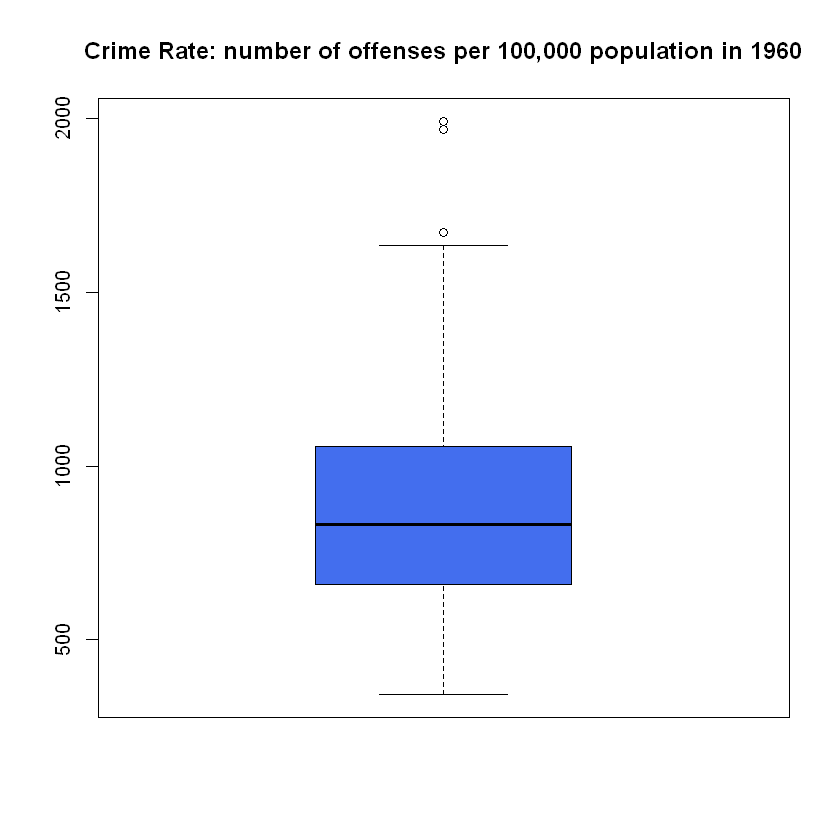

In [9]:
boxplot(dfcrime$Crime, names=c("Crime"),col=c("royalblue2"), main="Crime Rate: number of offenses per 100,000 population in 1960")

#### It looks like values around and above 1750 crimes per 100K inhabitants are on the tail of the distribution

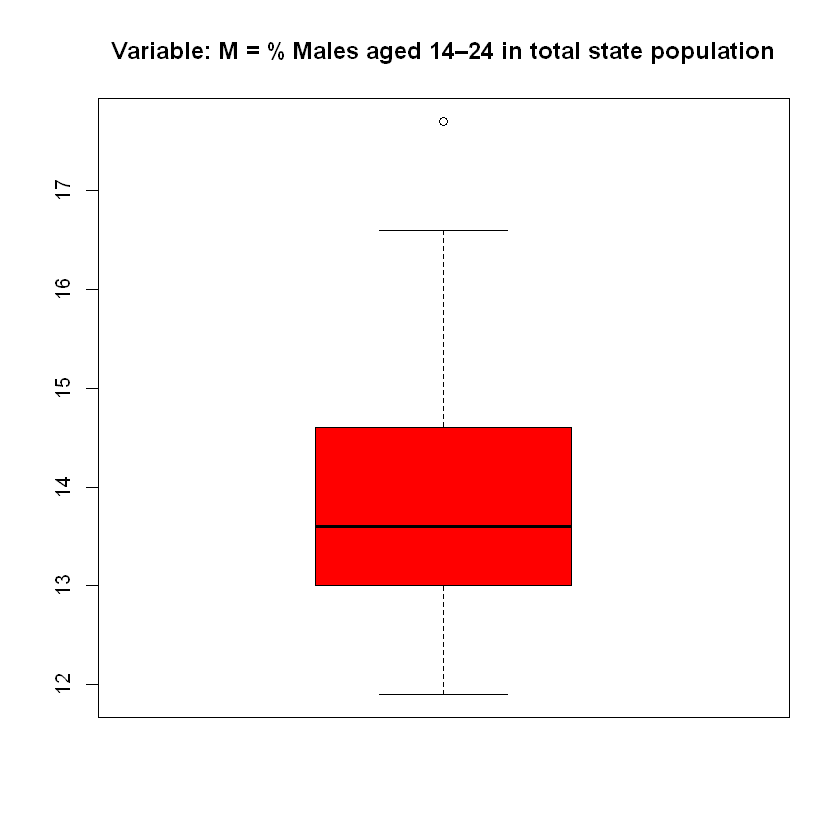

In [8]:
boxplot(dfcrime$M, names=c("Males"), col=c("red"),main="Variable: M = % Males aged 14–24 in total state population")

In [20]:
# Now let's use Grubbs to test for outliers in the Crime Rate
library(outliers)
grubbs.test(dfcrime$Crime, type = 11, opposite = FALSE, two.sided = FALSE )


	Grubbs test for two opposite outliers

data:  dfcrime$Crime
G = 4.26877, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


In [21]:
grubbs.test(dfcrime$Crime, type = 10, opposite = FALSE, two.sided = FALSE )


	Grubbs test for one outlier

data:  dfcrime$Crime
G = 2.81287, U = 0.82426, p-value = 0.07887
alternative hypothesis: highest value 1993 is an outlier


In [32]:
grubbs.test(dfcrime$U1, type = 10)


	Grubbs test for one outlier

data:  dfcrime$U1
G = 2.58098, U = 0.85204, p-value = 0.1784
alternative hypothesis: highest value 0.142 is an outlier


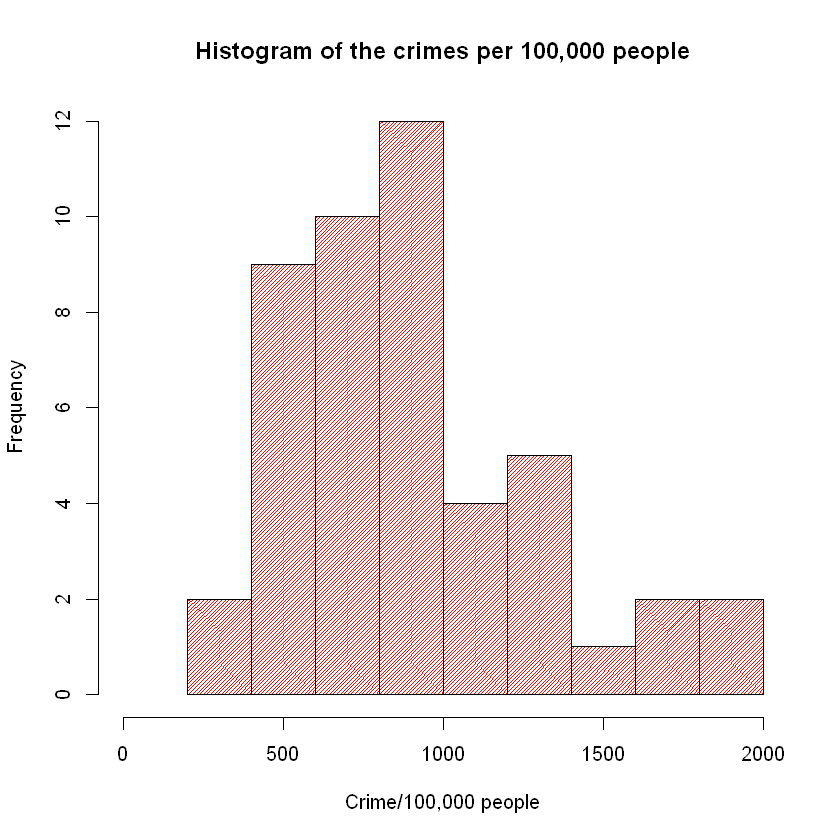

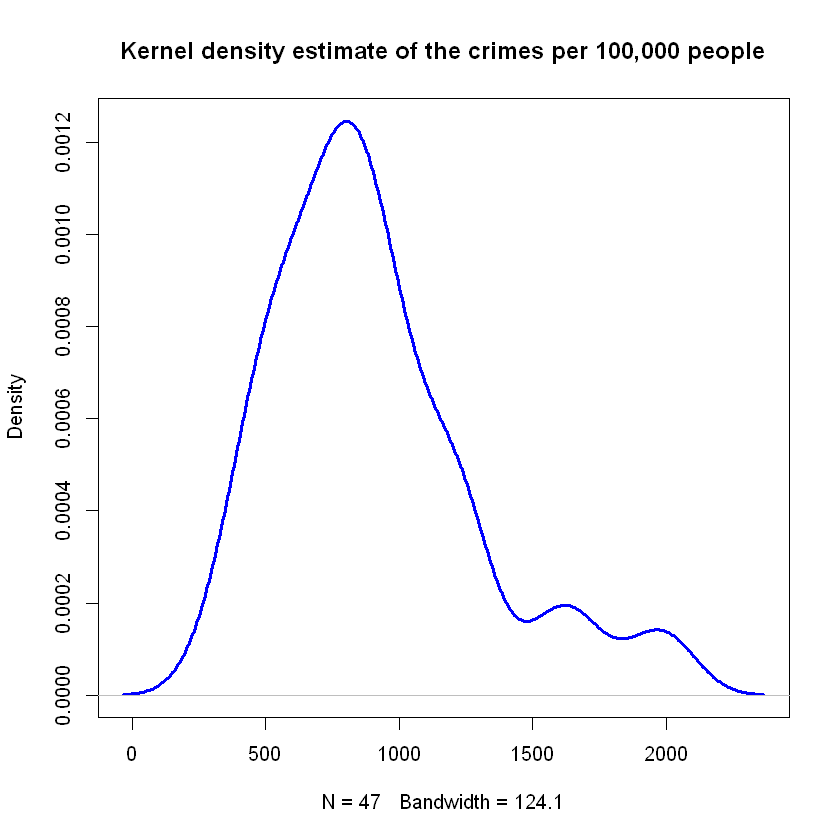

In [38]:
# Plot distribution of the last column crime per 100,000 people
hist(dfcrime$Crime,breaks=10,main="Histogram of the crimes per 100,000 people",
     density = 50,col='red',border = 'black',xlim = c(0,2000),xlab="Crime/100,000 people")
# Also plot the kernel density estimation
plot(density(dfcrime$Crime),lwd=3,col='blue',main="Kernel density estimate of the crimes per 100,000 people")

In [34]:
# Calculate and print mean and standard deviation of the crime data
print(paste("Mean of the crime data:",mean(dfcrime$Crime)))
print(paste("Standard deviation of the crime data:",sd(dfcrime$Crime)))

# So, how far is the maximum data point from the mean?
distance.max <- (max(dfcrime$Crime)-mean(dfcrime$Crime))/sd(dfcrime$Crime)
print(paste("Distance (in terms of std dev) of the max data point from the mean:",distance.max))

[1] "Mean of the crime data: 905.085106382979"
[1] "Standard deviation of the crime data: 386.762697146186"
[1] "Distance (in terms of std dev) of the max data point from the mean: 2.81287441018599"
